In [1]:
%%capture
!pip install tensorflow pandas pyyaml h5py

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
try:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except RuntimeError as e:
    print(e)

In [4]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [5]:
def R2(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

In [6]:
test = dict(np.load("./data/data_single_test.npz"))

In [7]:
model = tf.keras.models.load_model("model_single.h5", custom_objects={"rmse": rmse, "R2": R2})

In [8]:
X_test, y_test = [test[i.name] for i in model.inputs], test["score"]
evaluate = model.predict(X_test).squeeze()
evaluate = pd.DataFrame([y_test, evaluate], index=["target", "predicted"]).T
evaluate['name'] = pd.read_csv("./data/single_muts_train.csv")["name"].apply(lambda x: x.split("_")[0])
evaluate.to_csv("evaluate_single.csv")
evaluate.corr()

,target,predicted
target,1.000000,0.910432
predicted,0.910432,1.000000


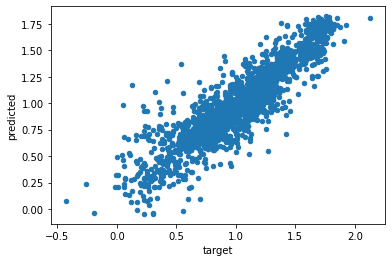

In [9]:
_ = evaluate.plot.scatter("target", "predicted")

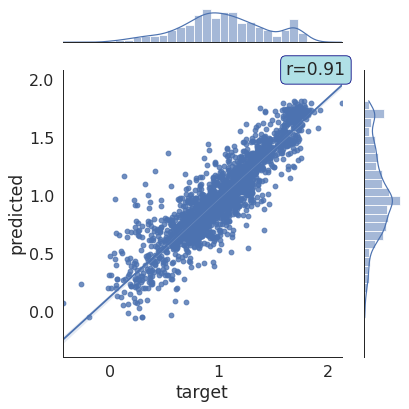

In [10]:
sns.set_theme(style="white")
sns.set_context("paper", font_scale=1.8)

def annotate(data, **kws):
    p = data.corr().loc["predicted", "target"]
    ax = plt.gca()
    return 'r={:.2f}'.format(p)

g = sns.jointplot(
    x="target",
    y="predicted", 
    palette="viridis",
    kind="reg",
    data=evaluate
);
g.ax_joint.annotate(
    annotate(evaluate),
    xy=(0.8, 1),
    xycoords='axes fraction',
    ha='left',
    va='center',
    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'}
)
plt.tight_layout()
plt.savefig('./scatter_single_reg.png', dpi=800)

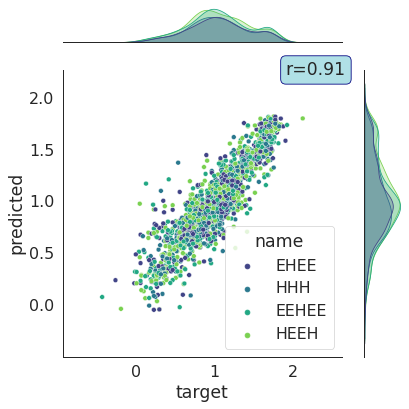

In [11]:
g = sns.jointplot(
    x="target",
    y="predicted", 
    palette="viridis",
    hue="name",
    data=evaluate
);
g.ax_joint.annotate(
    annotate(evaluate),
    xy=(0.8, 1),
    xycoords='axes fraction',
    ha='left',
    va='center',
    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'}
)
plt.tight_layout()
plt.savefig('./scatter_single_hue.png', dpi=800)

In [12]:
test = dict(np.load("./data/data_multi_test.npz"))

In [13]:
model = tf.keras.models.load_model("model_multi.h5", custom_objects={"rmse": rmse, "R2": R2})

In [14]:
X_test, y_test = [test[i.name] for i in model.inputs], test["score"]
evaluate = model.predict(X_test).squeeze()
evaluate = pd.DataFrame([y_test, evaluate], index=["target", "predicted"]).T
evaluate['name'] = pd.read_csv("./data/multiple_muts_train.csv")["name"].apply(lambda x: x.split("_")[0])
evaluate.to_csv("evaluate_multi.csv")
evaluate.corr()

,target,predicted
target,1.000000,0.550283
predicted,0.550283,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


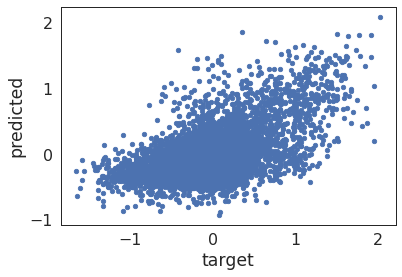

In [15]:
_ = evaluate.plot.scatter("target", "predicted")

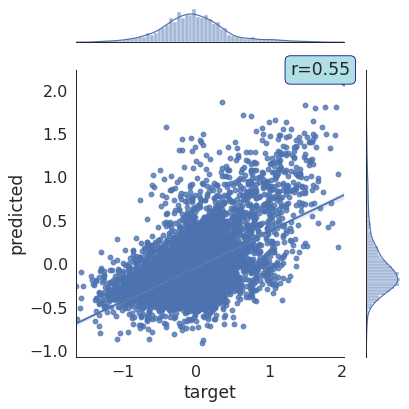

In [16]:
#sns.set_theme(style="white")

g = sns.jointplot(
    x="target",
    y="predicted", 
    palette="viridis",
    kind="reg",
    data=evaluate
);
g.ax_joint.annotate(
    annotate(evaluate),
    xy=(0.8, 1),
    xycoords='axes fraction',
    ha='left',
    va='center',
    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'}
)
plt.tight_layout()
plt.savefig('./scatter_multi_reg.png', dpi=800)

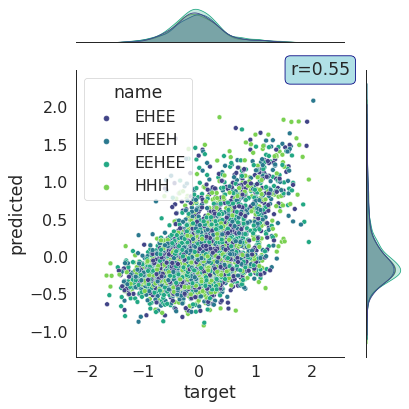

In [17]:
g = sns.jointplot(
    x="target",
    y="predicted", 
    palette="viridis",
    hue="name",
    data=evaluate
);
g.ax_joint.annotate(
    annotate(evaluate),
    xy=(0.8, 1),
    xycoords='axes fraction',
    ha='left',
    va='center',
    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'}
)
plt.tight_layout()
plt.savefig('./scatter_multi_hue.png', dpi=800)

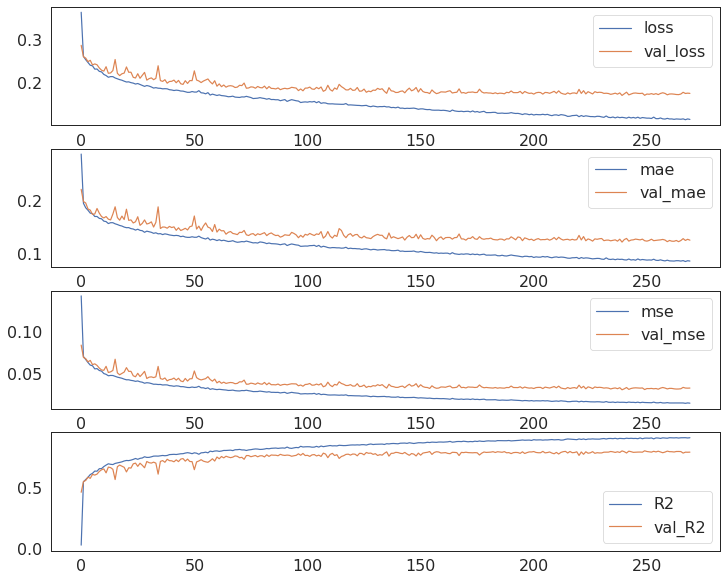

In [27]:
history = pd.read_csv("model_single_train_history.csv", index_col=0)
plot = list(history.columns)
size = int(len(plot)/2)
fig, axs = plt.subplots(size, 1, figsize=(12, 10))
plot = [[p, 'val_' + p] for p in plot[:size]]
for i, p in enumerate(plot):
    history[p].plot(ax=axs[i])
plt.savefig('./model_single_train.png', dpi=800)